# Módulo 04 - Detecção e Reconhecimento Facial

A face é crucial na interação visual, sendo capaz de revelar informações não-verbais valiosas, como identificação, intenções e sentimentos, presentes em expressões faciais humanas. A análise de expressões faciais se torna uma área fascinante para quem estuda visão computacional, pois intersecta campos como reconhecimento de objetos, tratamento de imagens e identificação ou rastreio de pontos característicos (*landmarks*).

**Este notebook tem como foco a análise, detecção e reconhecimento facial**, um campo que tem ganhado destaque na área de inteligência artificial, uma vez que é possível obter uma riqueza de dados a partir de rostos por meio de algoritmos de visão computacional.

![Imagens](img/m04.png)

Este notebook faz parte do programa da [Especialização em Visão Computacional](https://escola.sigmoidal.ai/especializacao-em-visao-computacional).

## Evolução dos Algoritmos de Detecção de Rosto

Ao longo do tempo, diversos algoritmos de detecção de rosto têm sido desenvolvidos, cada um com seus méritos e aplicações específicas. Iniciantes na área podem se sentir sobrecarregados pela diversidade de tutoriais disponíveis - uns focando em Haar Cascades, outros na biblioteca dlib e, mais recentemente, a ascensão do MediaPipe, que tem ganhado destaque a ponto de ofuscar alternativas tradicionais como o SSD (*Single Shot Multibox Detector*).

Para ilustrar essa evolução e ajudar na compreensão desse campo, a figura abaixo (retirada do artigo [What is Face Detection](https://learnopencv.com/what-is-face-detection-the-ultimate-guide/)) oferece um panorama dos algoritmos ao longo do tempo. **Mas como navegar por essa variedade sem se perder? Como tomar a melhor decisão para sua aplicação?**

![Imagens](img/timeline-of-face-detection-methods.png)


### Escolhendo o modelo ideal

O modelo perfeito para detecção facial deve alinhar-se com os requisitos únicos do seu projeto. O autor do artigo mencionado sugere que a decisão deve ser pautada por três critérios fundamentais:

**Precisão de Detecção Superior:** Caso a prioridade seja capturar cada rosto com a maior precisão possível, os algoritmos DSFD ou RetinaFace-resnet50 emergem como as melhores escolhas. No entanto, é preciso estar ciente de que a alta complexidade de tais modelos resulta em uma velocidade de inferência reduzida, o que pode ser um empecilho para aplicações que exigem resposta em tempo real.

**Velocidade de Detecção Máxima:** Se o que importa é a rapidez da inferência, mesmo que isso signifique perder algumas detecções em cenários complexos, a solução de detecção facial do MediaPipe é a alternativa ideal.

**Melhor custo beneficio  entre velocidade e precisão:** Para aqueles que procuram um meio-termo, os modelos YuNet e RetinaFace-Mobilenetv1 apresentam-se como candidatos equilibrados. Eles oferecem uma velocidade de inferência rápida, adequada para aplicações em tempo real, sem sacrificar demasiadamente a precisão.

Selecionar o algoritmo correto é um passo decisivo que pode determinar o sucesso da sua aplicação. Neste módulo, nós trabalharemos especificamente com: 

* Módulo DNN do OpenCV
* MediaPipe Solutions

## Utilizando o Módulo DNN do OpenCV para Detecção de Rosto

O OpenCV oferece ferramentas robustas para a detecção de rostos através do seu módulo de Redes Neurais Profundas (DNN - *Deep Neural Network*). Este módulo incorpora a capacidade de execução de passagens diretas (inferência) utilizando redes neurais pré-treinadas provenientes de diversos frameworks, tais como Caffe, TensorFlow, Torch e Darknet.

Desde a versão 3.1 do OpenCV, o módulo DNN tem se tornado um componente valioso, uma vez que permite a realização de inferências sem a necessidade de treinamento da rede. A partir da versão 3.3, o módulo foi incorporado ao repositório principal do OpenCV, passando por otimizações e acelerações significativas.

### *Single Shot Multibox Detector* - SSD

O detector de rosto disponibilizado pelo OpenCV é construído sobre o framework SSD (*Single Shot MultiBox Detector*) utilizando uma arquitetura de rede ResNet-10. A capacidade deste detector reside na sua habilidade de identificar e localizar rostos em imagens, fazendo uso de modelos pré-treinados que simplificam a implementação e integração em diversas aplicações.

O OpenCV disponibiliza dois modelos específicos para a detecção de rosto:

1. **Detector de Rosto (FP16)**: Esta versão utiliza uma representação *float-point** de 16 bits da implementação original em Caffe.
2. **Detector de Rosto (UINT8)**: Trata-se de uma versão quantizada de 8 bits utilizando TensorFlow.

Para a utilização de ambos os modelos, são necessários dois conjuntos de arquivos: **o arquivo de modelo, contendo os pesos das camadas da rede, e o arquivo de configuração, que define a arquitetura da rede neural.**

#### Modelo Caffe
- **res10_300x300_ssd_iter_140000_fp16.caffemodel**: Contém os pesos das camadas da rede.
- **deploy.prototxt**: Define a arquitetura da rede neural.

#### Modelo TensorFlow
- **opencv_face_detector_uint8.pb**: Contém os pesos das camadas da rede.
- **opencv_face_detector.pbtxt**: Define a arquitetura do modelo.

### Aplicação Prática

#TODO


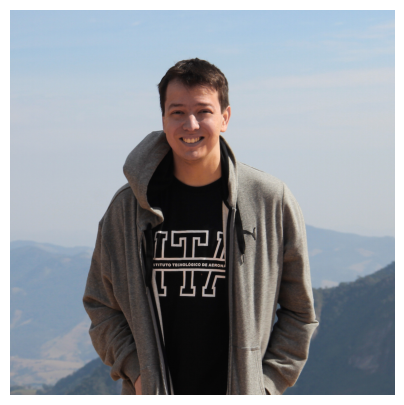

In [2]:
# Importando as bibliotecas necessárias
import cv2       
import numpy as np  
import sigmoidal as sig

%matplotlib inline

# Carregando a imagem
img = cv2.imread('data/carlos.jpg')

# Exibindo a imagem usando a função plot_image da biblioteca sigmoidal
sig.plot_image(img)

### Leitura do Modelo DNN

A função readNetFromCaffe é utilizada para carregar um modelo de rede neural pré-treinado armazenado no formato do framework Caffe. Esta função é frequentemente utilizada na preparação de modelos para detecção e classificação em tarefas de visão computacional. Ela lê os arquivos de descrição da arquitetura da rede e os pesos aprendidos durante o treinamento e cria uma instância da rede neural para inferência.

#### <font style="color:rgb(0, 0, 128)">Sintaxe da Função</font>

```python 
cv2.dnn.readNetFromCaffe(
    prototxt: str,
    caffeModel: str
) -> cv2.dnn_Net
```

**Parâmetros**<br>

- **prototxt** (*str*): Caminho para o arquivo .prototxt que contém a descrição textual da arquitetura da rede neural.
- **caffeModel** (*str*): Caminho para o arquivo .caffemodel que contém os pesos da rede neural treinada.

**Retorno**<br>

- **cv2.dnn_Net**: Retorna uma instância da rede neural para inferência.


In [3]:
# Carrega o modelo
model = cv2.dnn.readNetFromCaffe('data/models/deploy.prototxt', 'data/models/res10_300x300_ssd_iter_140000.caffemodel')

### Conversão de Imagem para Blob

A função blobFromImage é usada para criar um blob 4-dimensional a partir de uma imagem. Opcionalmente, redimensiona e corta a imagem a partir do centro, subtrai valores médios, escala valores pelo fator de escala e troca os canais Azul e Vermelho.

#### <font style="color:rgb(0, 0, 128)">Sintaxe da Função</font>

```python
cv2.dnn.blobFromImage(
    image: np.ndarray,
    scalefactor: Optional[float] = 1.0,
    size: Optional[Tuple[int, int]] = (0, 0),
    mean: Optional[Tuple[float, float, float]] = (0.0, 0.0, 0.0),
    swapRB: Optional[bool] = True,
    crop: Optional[bool] = False,
    ddepth: Optional[int] = cv2.CV_32F
) -> np.ndarray
```

**Parâmetros**<br>

- **image** (*np.ndarray*): Imagem de entrada (com 1, 3 ou 4 canais).
- **scalefactor** (*float, opcional*): Multiplicador para os valores da imagem.
- **size** (*Tuple[int, int], opcional*): Tamanho espacial para a imagem de saída.
- **mean** (*Tuple[float, float, float], opcional*): Escalar com valores médios que são subtraídos dos canais.
- **swapRB** (*bool, opcional*): Indica se a troca dos canais primeiro e último em uma imagem de 3 canais é necessária.
- **crop** (*bool, opcional*): Indica se a imagem será cortada após o redimensionamento.
- **ddepth** (*int, opcional*): Profundidade do blob de saída. Escolha entre CV_32F ou CV_8U.

**Retorno**<br>

- **np.ndarray**: Retorna a imagem de saída do mesmo tamanho e profundidade que a imagem de entrada.

In [7]:
# Cria um blob a partir da imagem
img_copy = img.copy()

blob = cv2.dnn.blobFromImage(cv2.resize(
    img_copy, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

### Configurando o Valor de Entrada

A função setInput define um novo valor de entrada para a rede neural.

#### <font style="color:rgb(0, 0, 128)">Sintaxe da Função</font>

```python
cv2.dnn_Net.setInput(
    blob: np.ndarray,
    name: Optional[str] = None,
    scalefactor: Optional[float] = None,
    mean: Optional[Tuple[float, float, float]] = None
) -> None
```

**Parâmetros**<br>

- **blob** (*np.ndarray*): Novo blob.
- **name** (*str, opcional*): Nome da camada de entrada.
- **scalefactor** (*float, opcional*): Fator de normalização opcional.
- **mean** (*Tuple[float, float, float], opcional*): Valores de subtração de média opcionais.

**Retorno**<br>

- **None**

In [8]:
# Define o blob como entrada para o modelo
model.setInput(blob)

### Detecções Usando o Modelo DNN

A função forward executa uma passagem para frente para calcular a saída de uma camada com o nome outputName. Retorna o blob para a primeira saída da camada especificada.

#### <font style="color:rgb(0, 0, 128)">Sintaxe da Função</font>

```python
cv2.dnn_Net.forward(
    outputName: Optional[str] = None
) -> np.ndarray
```

**Parâmetros**<br>

- **outputName** (*str, opcional*): Nome da camada para a qual a saída é necessária.

**Retorno**<br>

- **np.ndarray**: Retorna o blob para a primeira saída da camada especificada.

In [9]:
# Executa uma passagem para frente (forward pass) através do modelo
detections = model.forward()

Agora, já com as detecções, primeiramente são extraídas as dimensões da imagem de entrada `img_copy`, especificamente a altura (`h`) e a largura (`w`). Isso é feito para posteriormente ajustar as coordenadas dos retângulos delimitadores das detecções em relação ao tamanho real da imagem. Em seguida, o código entra em um laço para iterar sobre todas as detecções disponíveis, que estão armazenadas na matriz `detections`.

Dentro *loop*, para cada detecção, se obtém o valor de confiança associado, que indica quão confiante o modelo está de que a região detectada contém um rosto. Um *threshold* é definido, e somente as detecções que superam esse limiar são consideradas. Para essas detecções, o código calcula as coordenadas do retângulo delimitador ajustadas ao tamanho da imagem, converte essas coordenadas para inteiros e, em seguida, desenha o retângulo e exibe o valor de confiança na imagem `img_copy`.


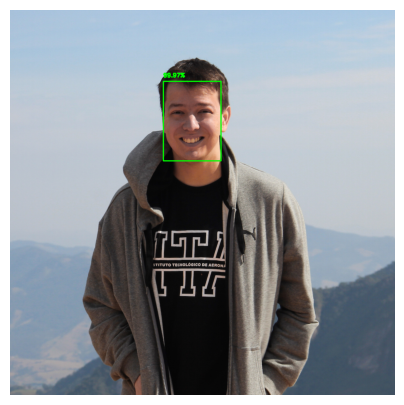

In [10]:
# Obtém as dimensões da imagem
(h, w) = img_copy.shape[:2]

# Itera sobre as detecções
for i in range(detections.shape[2]):
    # Obtém a confiança da detecção
    confidence = detections[0, 0, i, 2]

    # Define um limiar de confiança para considerar uma detecção válida
    confidence_threshold = 0.5

    # Verifica se a confiança é maior que o limiar
    if confidence > confidence_threshold:
        # Obtém as coordenadas do retângulo delimitador
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])

        # Converte as coordenadas para inteiros
        (startX, startY, endX, endY) = box.astype("int")

        # Desenha o retângulo delimitador na imagem
        cv2.rectangle(img_copy, (startX, startY), (endX, endY), (0, 255, 0), 2)

        # Adiciona a confiança da detecção na imagem
        text = "{:.2f}%".format(confidence * 100)
        cv2.putText(img_copy, text, (startX, startY - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

# Neste ponto, 'img_copy' contém as detecções processadas
sig.plot_image(img_copy)

In [3]:
def process_detections(
    detections: np.ndarray,
    frame: np.ndarray,
    confidence_threshold: float = 0.5
) -> np.ndarray:
    """
    Processa as detecções retornadas pelo modelo de detecção de rostos, desenhando os retângulos
    delimitadores e adicionando as informações de confiança.

    Parâmetros:
        detections (np.ndarray): Matriz contendo as detecções, onde cada detecção é representada por uma linha 
                                 contendo informações como as coordenadas do retângulo delimitador e a 
                                 confiança da detecção.
        frame (np.ndarray): Imagem de entrada onde os rostos foram detectados.
        confidence_threshold (float): Limiar de confiança para considerar uma detecção válida.

    Retorno:
        np.ndarray: Matriz contendo as detecções processadas, onde cada detecção é representada por uma linha 
                    contendo informações como as coordenadas do retângulo delimitador e a 
                    confiança da detecção.

    Exemplo:
        detections = process_detections(detections, frame)
    """
    # Obtém as dimensões da imagem
    (h, w) = frame.shape[:2]

    # Itera sobre as detecções
    for i in range(detections.shape[2]):
        # Obtém a confiança da detecção
        confidence = detections[0, 0, i, 2]

        # Verifica se a confiança é maior que o limiar
        if confidence > confidence_threshold:
            # Obtém as coordenadas do retângulo delimitador
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])

            # Converte as coordenadas para inteiros
            (startX, startY, endX, endY) = box.astype("int")

            # Desenha o retângulo delimitador
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

            # Adiciona a confiança da detecção
            text = "{:.2f}%".format(confidence * 100)
            cv2.putText(frame, text, (startX, startY - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

    return frame


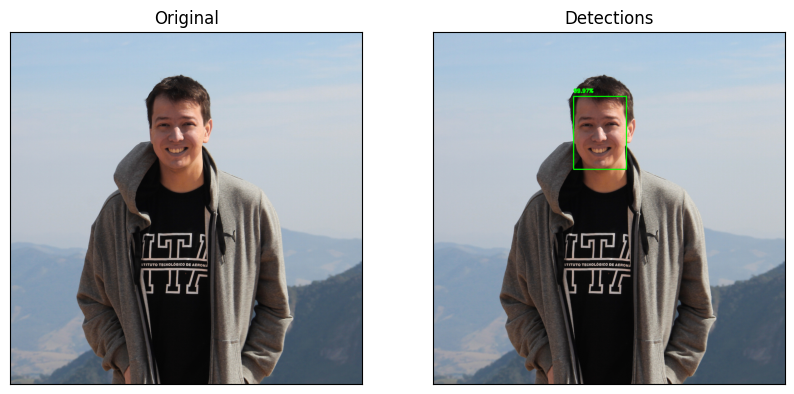

In [7]:
# Carrega uma imagem de teste
img = cv2.imread('data/carlos.jpg')

# Cria uma cópia da imagem original
img_copy = img.copy()

# Detectar, processar e exibir as detecções
detections = detect_faces(model, img_copy)
detections = process_detections(detections, img_copy)
sig.plot_images_grid([img, detections], grid_size=(1, 2), titles=['Original', 'Detections'])

In [8]:
def load_model(
    model_path: str,
    config_path: str
) -> cv2.dnn_Net:
    """
    Carrega um modelo de rede neural pré-treinado.

    Parâmetros:
        model_path (str): Caminho para o arquivo contendo o modelo pré-treinado.

    Retorno:
        cv2.dnn_Net: Modelo pré-treinado de detecção de rostos no formato Caffe.

    Exemplo:
        model = load_model(model_path)
    """
    # Carrega o modelo
    model = cv2.dnn.readNetFromCaffe(config_path, model_path)

    return model

In [ ]:
def detect_faces(
    model: cv2.dnn_Net,
    frame: np.ndarray
) -> np.ndarray:
    """
    Detecta rostos em uma imagem utilizando um modelo de rede neural pré-treinado.

    Parâmetros:
        model (cv2.dnn_Net): Modelo pré-treinado de detecção de rostos no formato Caffe.
        frame (np.ndarray): Imagem de entrada onde os rostos serão detectados.

    Retorno:
        np.ndarray: Matriz contendo as detecções, onde cada detecção é representada por uma linha 
                    contendo informações como as coordenadas do retângulo delimitador e a 
                    confiança da detecção.

    Exemplo:
        detections = detect_faces(model, frame)
    """
    # Cria um blob a partir da imagem
    blob = cv2.dnn.blobFromImage(cv2.resize(
        frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

    # Define o blob como entrada para o modelo
    model.setInput(blob)

    # Executa uma passagem para frente (forward pass) através do modelo
    detections = model.forward()

    return detections